## Chapter 1: Darcy's Law for Reservoir Pressure Profiling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
re = 3000
rwf = 0.5
pwf = 1500 # psi
h = 60 #ft
k = 150 #mD
q = 200 #bbl/d
mu = 15 # cp
B = 1 #rb/stb

In [3]:
r = np.linspace(rwf,re,500)

In [4]:
pressure = []
for i in range(len(r)):
    p = pwf + (141.2*q*mu*B*(np.log(r[i]/rwf))/k/h)
    pressure.append(p)

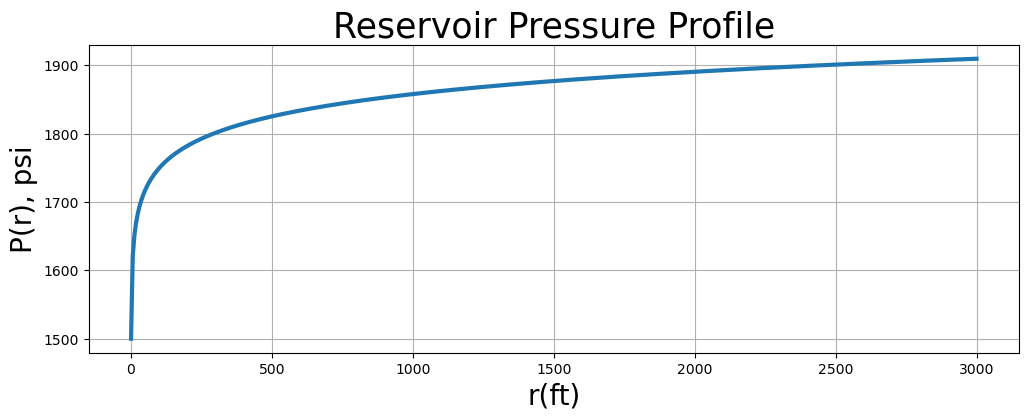

In [5]:
plt.style.use('default')
plt.figure(figsize=(12,4))

plt.plot(r,pressure, lw=3)
plt.xlabel('r(ft)', size=20)
plt.ylabel('P(r), psi', size=20)
plt.title('Reservoir Pressure Profile', size=25)
plt.grid(True)

### Whole thing in one function:

In [6]:
def pressureprofile():
    re = float(input('Outer radius of Reservoir(ft): '))
    rw = float(input('Wellbore Radius(ft): '))
    Pwf = float(input('Bottomhole Pressure(psi): '))
    h = float(input('Net Pay Thickness(ft): '))
    k= float(input('Average REservoir Permeability: '))
    q = float(input('Flowrate(stb/day): '))
    mu = float(input('Oil Viscosity: '))
    B = 1 # rb/stb
    r = np.linspace(rw, re,500)
    
    Pressure = []
    
    for i in range(len(r)):
        P = Pwf + (141.2*q*mu*B*(np.log(r[i]/rw))/k/h)
        Pressure.append(P)
    plt.figure(figsize=(8,6))
    plt.plot(r,Pressure)
    plt.xlabel('r(ft)', size=20)
    plt.ylabel('P(r), psi', size=20)
    plt.title('Reservoir Pressure Profile', size=25)
    #plt.axvspan(0,500, color='green')
    plt.grid(True, which='Both')

Outer radius of Reservoir(ft): 3000
Wellbore Radius(ft): 0.51
Bottomhole Pressure(psi): 4000
Net Pay Thickness(ft): 30
Average REservoir Permeability: 15
Flowrate(stb/day): 200
Oil Viscosity: 15


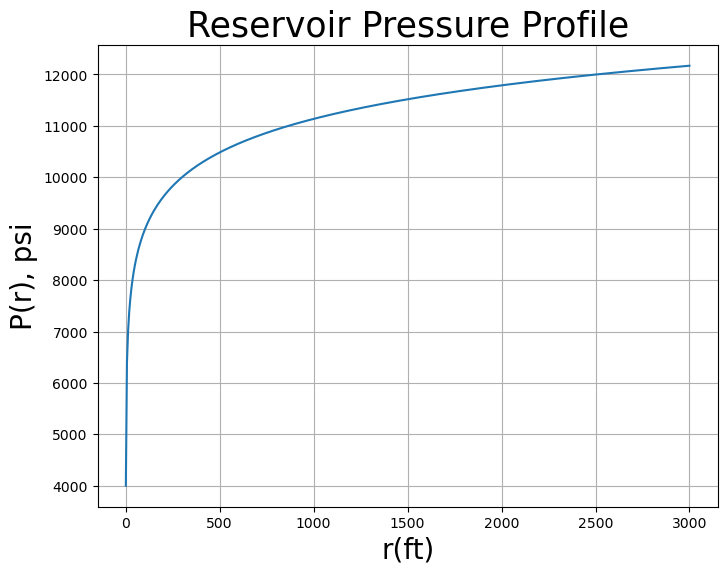

In [8]:
pressureprofile()

## Chapter 2: Dynamic/ GUI Pressure Profile

In [9]:
from ipywidgets import interact, interactive
from IPython.display import display

In [10]:
def flowprofile(k,mu,q):
    re = 3000
    rw = 0.5
    pe = 4000
    h = 30
    
    #k= float(input('Average REservoir Permeability: '))
    #q = float(input('Flowrate(stb/day): '))
    #mu = float(input('Oil Viscosity: '))
    
    B = 1 # rb/stb
    r = np.linspace(rw,re,500)
    
    P = pe - (141.2*q*mu*B*(np.log(re/r))/k/h)
    
    y_min = P[np.where(r==rw)]
    
    
    plt.style.use('default')
    plt.figure(figsize=(9,6))
    plt.plot(r,P, lw=4)
    
    plt.axhline(y_min,lw=3, color='red')
    
    plt.ylim(0,5000)
    plt.xlabel('r(ft)',size=20)
    plt.ylabel('P(r), psi', size=20)
    plt.title('Dynamic Pressure Profile', size=25)
    
    plt.grid(True)
    
    return r,P
    

In [11]:
w  = interactive(flowprofile, k=(200,1000), mu=(10,220), q=(100,200))


In [12]:
display(w)

interactive(children=(IntSlider(value=600, description='k', max=1000, min=200), IntSlider(value=115, descripti…